In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Data importation

In [2]:
df_train = pd.read_csv('data/customer_conversion_training_dataset.csv')
df_test = pd.read_csv('data/customer_conversion_testing_dataset.csv')

In [3]:
df_train.shape, df_test.shape

((100000, 19), (26145, 19))

#### Data preparation

In [4]:
from sklearn.model_selection import train_test_split
df_full_train, df_validation = train_test_split(df_train, test_size = 0.2, random_state = 42)

#### Data exploration

In [5]:
df_full_train.shape, df_validation.shape, df_test.shape

((80000, 19), (20000, 19), (26145, 19))

In [6]:
df_full_train.columns = ['LeadID', 'Age', 'Gender', 'Location', 'LeadSource',
       'TimeSpentMinutes', 'PagesViewed', 'LeadStatus', 'EmailSent',
       'DeviceType', 'ReferralSource', 'FormSubmissions', 'Downloads',
       'CTR_ProductPage', 'ResponseTimeHours', 'FollowUpEmails',
       'SocialMediaEngagement', 'PaymentHistory', 'Conversion']

df_validation.columns = ['LeadID', 'Age', 'Gender', 'Location', 'LeadSource',
       'TimeSpentMinutes', 'PagesViewed', 'LeadStatus', 'EmailSent',
       'DeviceType', 'ReferralSource', 'FormSubmissions', 'Downloads',
       'CTR_ProductPage', 'ResponseTimeHours', 'FollowUpEmails',
       'SocialMediaEngagement', 'PaymentHistory', 'Conversion']

df_test.columns = ['LeadID', 'Age', 'Gender', 'Location', 'LeadSource',
       'TimeSpentMinutes', 'PagesViewed', 'LeadStatus', 'EmailSent',
       'DeviceType', 'ReferralSource', 'FormSubmissions', 'Downloads',
       'CTR_ProductPage', 'ResponseTimeHours', 'FollowUpEmails',
       'SocialMediaEngagement', 'PaymentHistory', 'Conversion']

In [7]:
df_full_train.drop_duplicates(inplace = True)
df_full_train.reset_index(drop = True, inplace = True)

In [8]:
df_full_train.isnull().sum()

LeadID                   0
Age                      0
Gender                   0
Location                 0
LeadSource               0
TimeSpentMinutes         0
PagesViewed              0
LeadStatus               0
EmailSent                0
DeviceType               0
ReferralSource           0
FormSubmissions          0
Downloads                0
CTR_ProductPage          0
ResponseTimeHours        0
FollowUpEmails           0
SocialMediaEngagement    0
PaymentHistory           0
Conversion               0
dtype: int64

In [9]:
df_full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LeadID                 80000 non-null  int64  
 1   Age                    80000 non-null  int64  
 2   Gender                 80000 non-null  object 
 3   Location               80000 non-null  object 
 4   LeadSource             80000 non-null  object 
 5   TimeSpentMinutes       80000 non-null  int64  
 6   PagesViewed            80000 non-null  int64  
 7   LeadStatus             80000 non-null  object 
 8   EmailSent              80000 non-null  int64  
 9   DeviceType             80000 non-null  object 
 10  ReferralSource         80000 non-null  object 
 11  FormSubmissions        80000 non-null  int64  
 12  Downloads              80000 non-null  int64  
 13  CTR_ProductPage        80000 non-null  float64
 14  ResponseTimeHours      80000 non-null  int64  
 15  Fo

In [10]:
df_full_train['Conversion'] = df_full_train['Conversion'].astype('int') 

In [11]:
df_full_train.drop(columns = ['LeadID'], inplace = True)

In [12]:
numerical_columns = df_full_train.select_dtypes(include = ['int']).columns
numerical_columns = numerical_columns[numerical_columns != "Conversion"].tolist()
numerical_columns

['Age',
 'TimeSpentMinutes',
 'PagesViewed',
 'EmailSent',
 'FormSubmissions',
 'Downloads',
 'ResponseTimeHours',
 'FollowUpEmails',
 'SocialMediaEngagement']

In [13]:
categorical_columns = df_full_train.select_dtypes(include = ['object']).columns.tolist()
categorical_columns

['Gender',
 'Location',
 'LeadSource',
 'LeadStatus',
 'DeviceType',
 'ReferralSource',
 'PaymentHistory']

##### Numerical features exploration

In [14]:
df_full_train[numerical_columns].describe()

,Age,TimeSpentMinutes,PagesViewed,EmailSent,FormSubmissions,Downloads,ResponseTimeHours,FollowUpEmails,SocialMediaEngagement
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,39.982588,32.546375,8.499475,5.002950,2.499150,1.500850,12.516137,4.984875,110.159338
std,11.862359,16.150506,4.029057,3.167648,1.707692,1.116519,6.932933,3.167360,52.226468
min,20.000000,5.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,20.000000
25%,30.000000,19.000000,5.000000,2.000000,1.000000,1.000000,7.000000,2.000000,65.000000
50%,40.000000,33.000000,9.000000,5.000000,3.000000,2.000000,13.000000,5.000000,110.000000
75%,50.000000,47.000000,12.000000,8.000000,4.000000,2.000000,19.000000,8.000000,155.000000
max,60.000000,60.000000,15.000000,10.000000,5.000000,3.000000,24.000000,10.000000,200.000000


Age


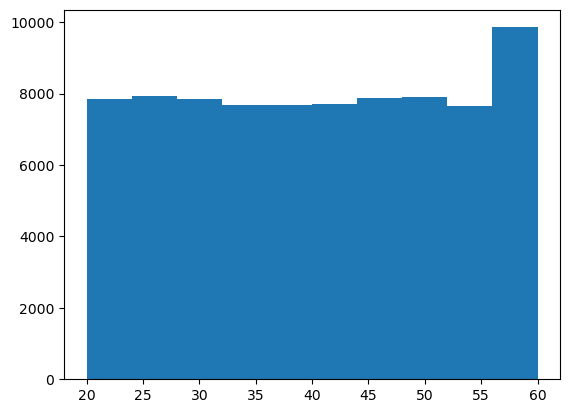

TimeSpentMinutes


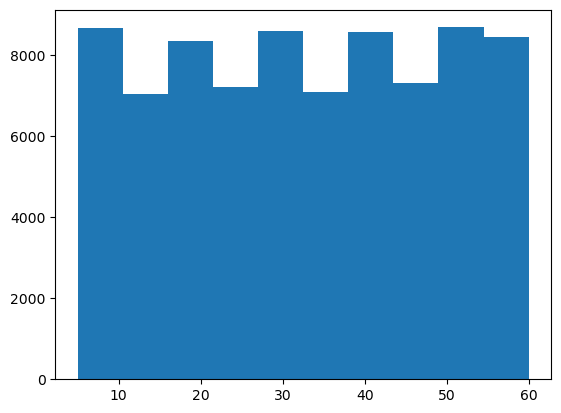

PagesViewed


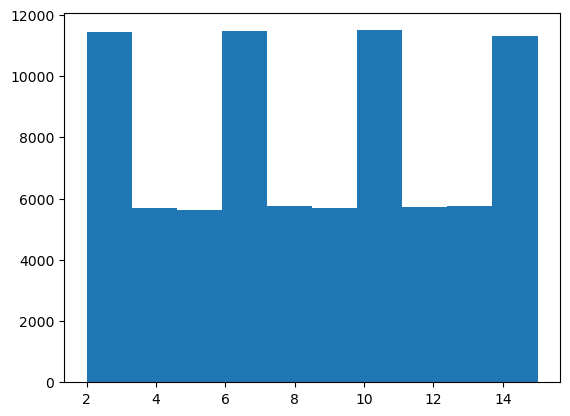

EmailSent


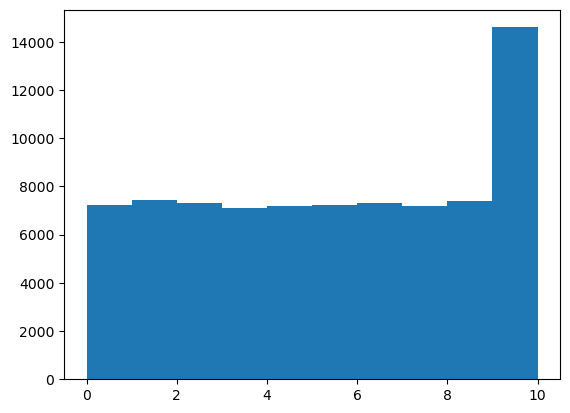

FormSubmissions


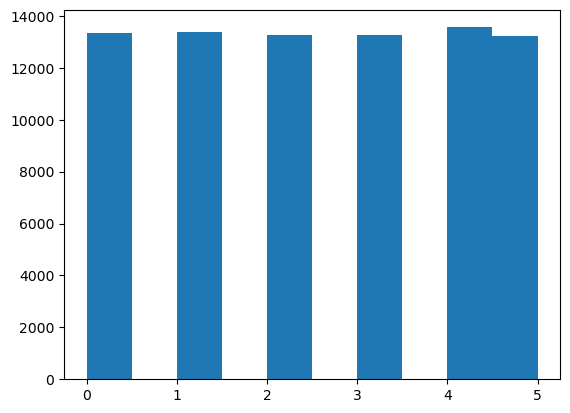

Downloads


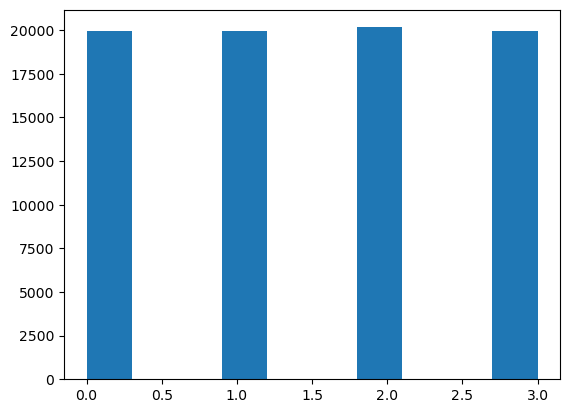

ResponseTimeHours


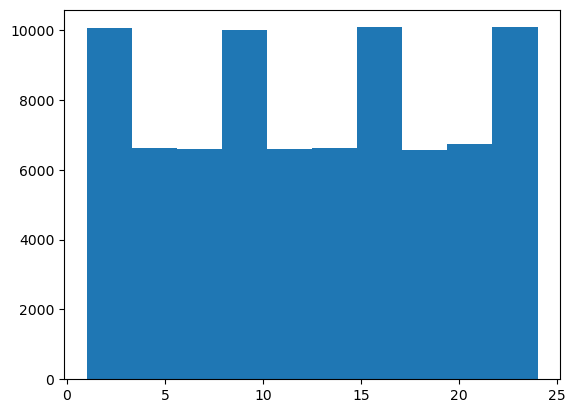

FollowUpEmails


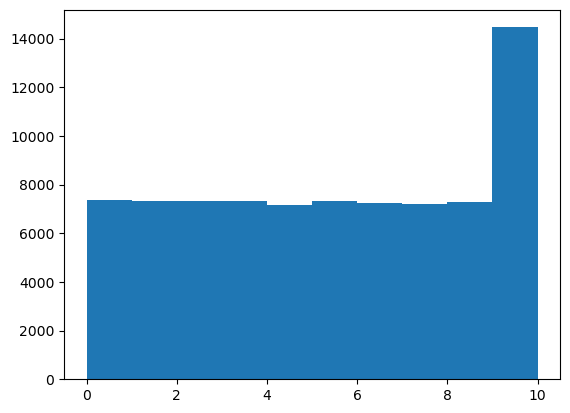

SocialMediaEngagement


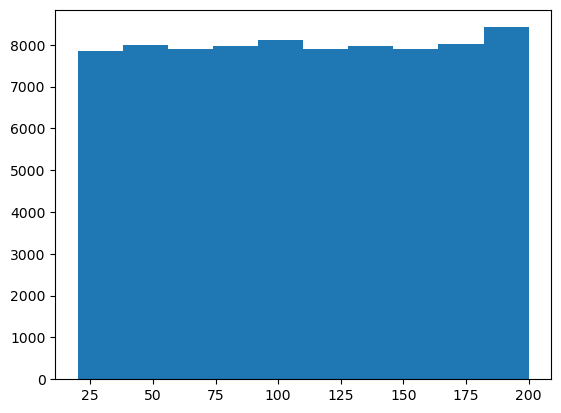

In [15]:
for num in numerical_columns:
    print(num)
    plt.figure()
    plt.hist(df_full_train[num])
    # Show/save figure as desired.
    plt.show()

In [16]:
index_outlier = []
for num in numerical_columns:
    q99 = np.quantile(df_full_train[num], .99)
    outlier = df_full_train[df_full_train[num] > q99].index.tolist()
    index_outlier.extend(outlier)
print(len(index_outlier))
index_outlier = set(index_outlier)
index_outlier = list(index_outlier)
print(len(index_outlier))    

445
445


In [17]:
import random
print(random.sample(index_outlier, 3))

[41239, 54280, 38941]


In [18]:
df_full_train_cleaned = df_full_train.drop(index = index_outlier,)

In [19]:
df_full_train_cleaned.reset_index(drop = True, inplace = True)

In [20]:
df_full_train.shape, df_full_train_cleaned.shape

((80000, 18), (79555, 18))

##### Categorical features exploration

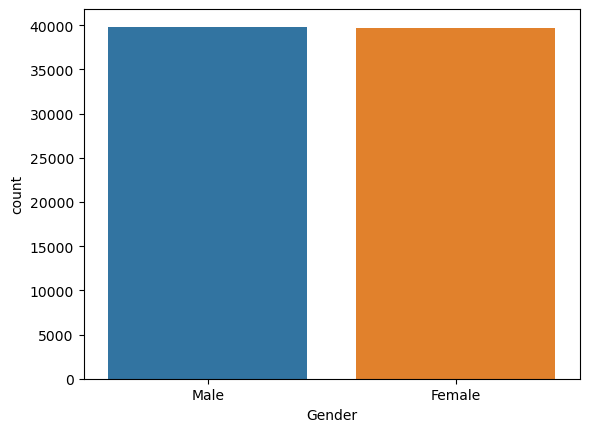

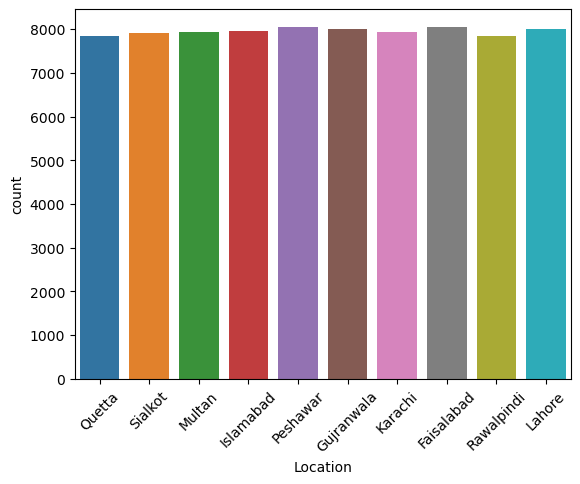

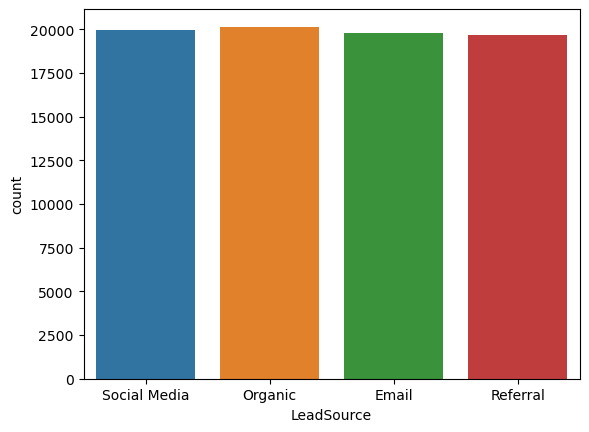

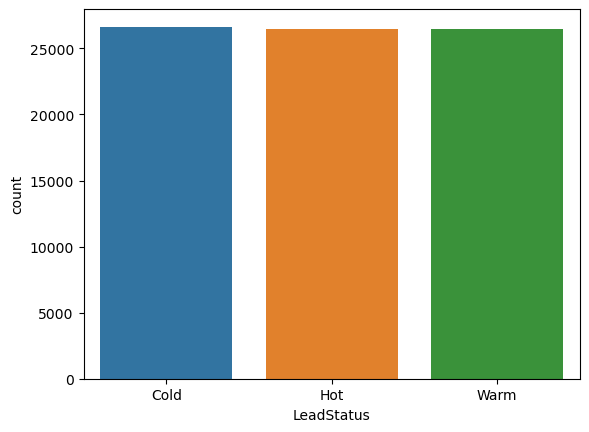

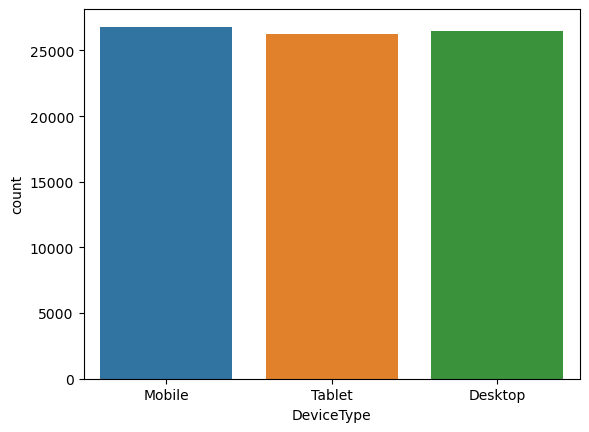

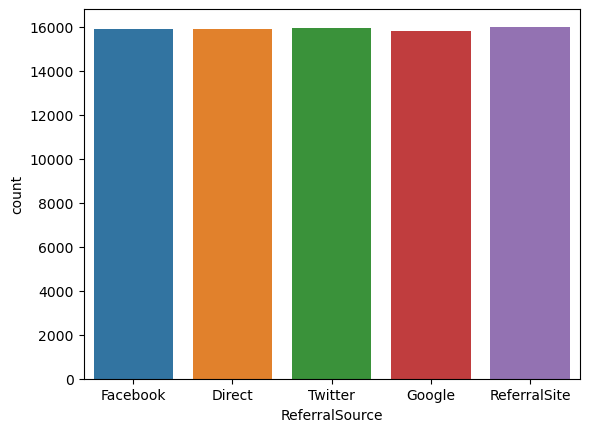

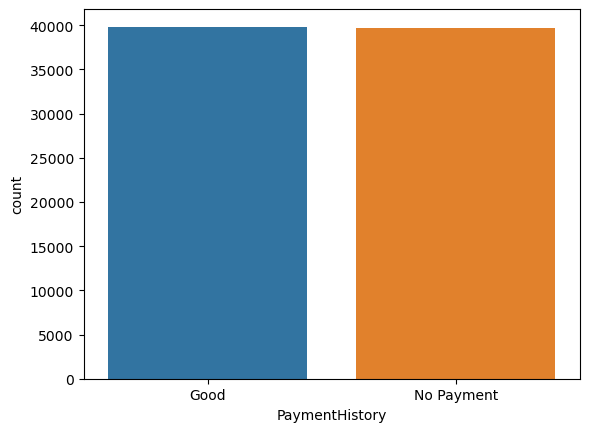

In [21]:
for cat in categorical_columns:
    plot = sns.countplot(x = cat, data = df_full_train_cleaned)
    if cat == "Location":
        plt.setp(plot.get_xticklabels(), rotation=45)
    plt.show()
    print()


##### Target feature exploration

In [22]:
df_full_train_cleaned['Conversion'].value_counts(normalize = True)

Conversion
0    0.983823
1    0.016177
Name: proportion, dtype: float64

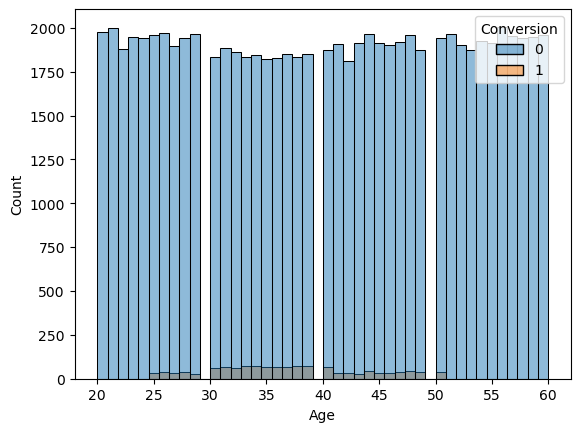

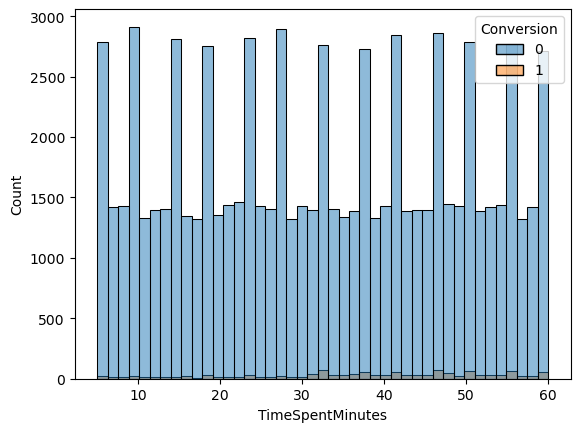

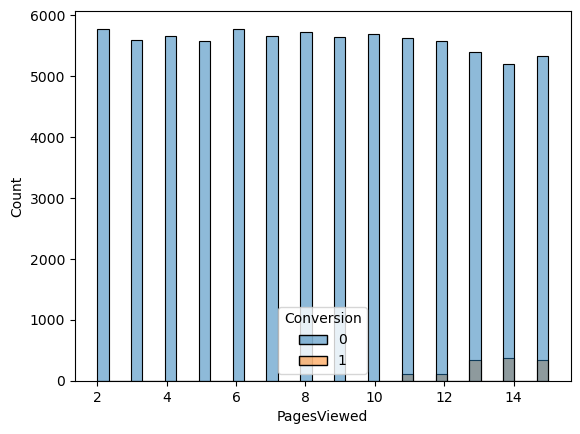

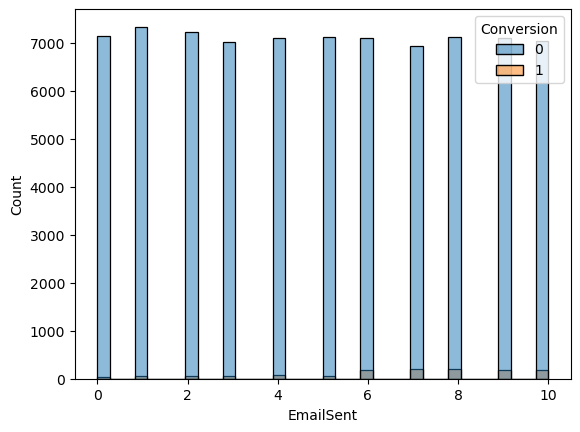

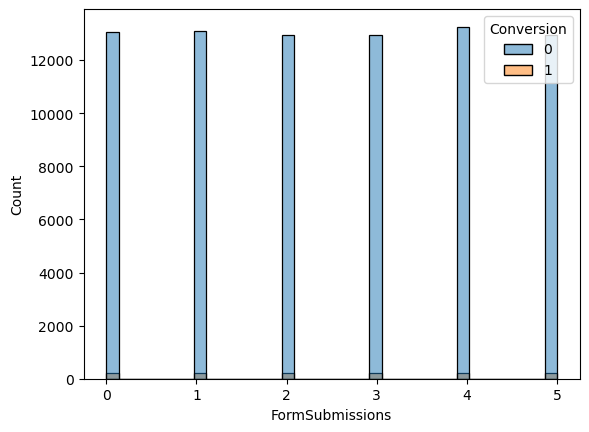

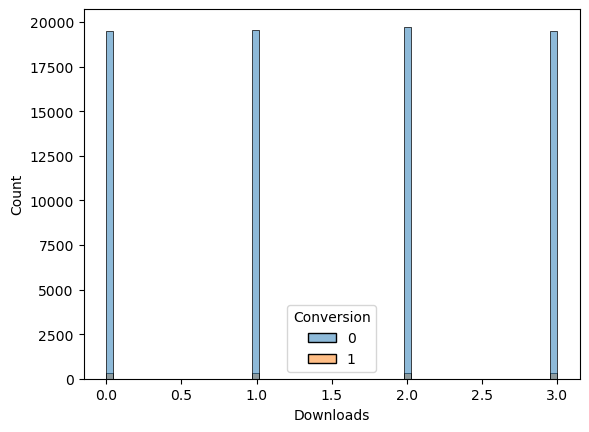

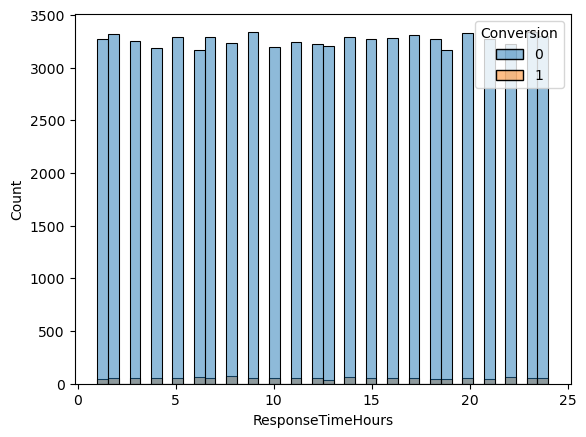

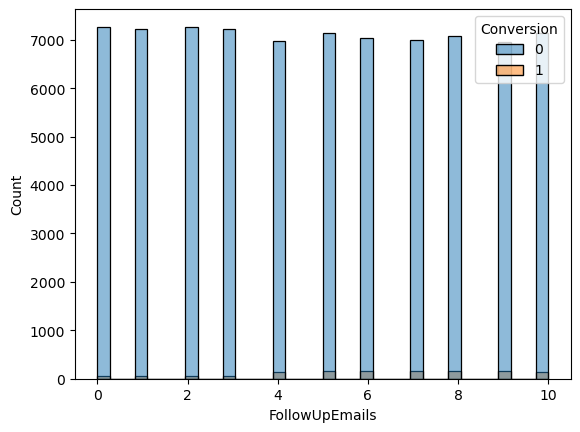

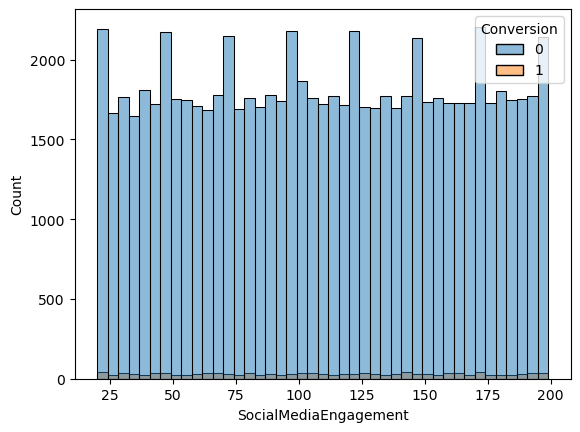

In [23]:
for num in numerical_columns:
    plot = sns.histplot(x = num, hue = 'Conversion', data = df_full_train_cleaned)
    # if cat == "Location":
    #     plt.setp(plot.get_xticklabels(), rotation=45)
    plt.show()
    print()

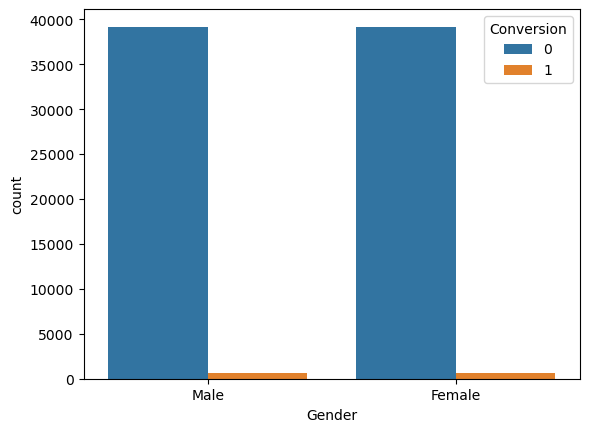

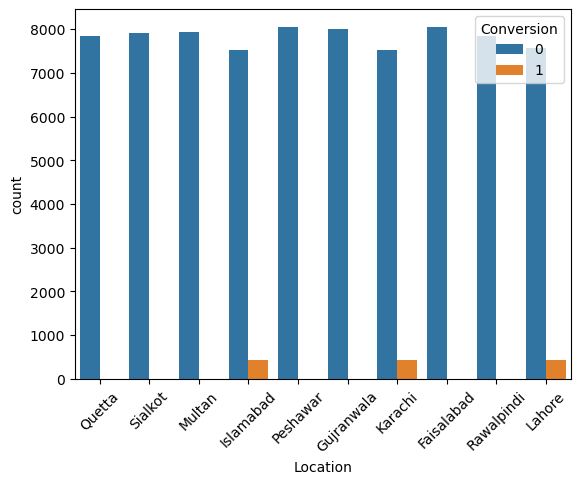

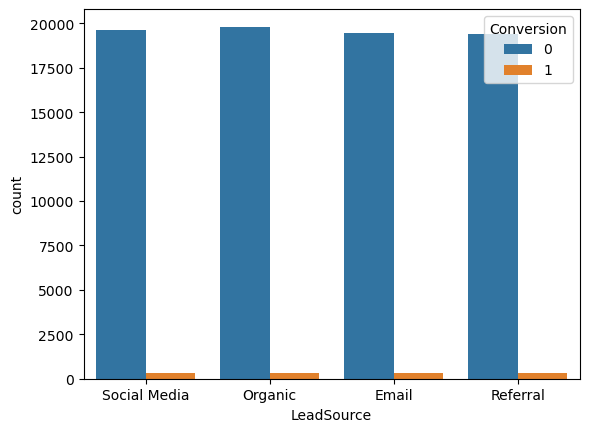

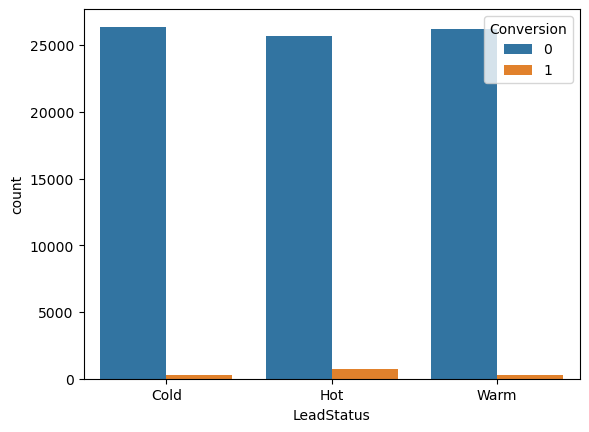

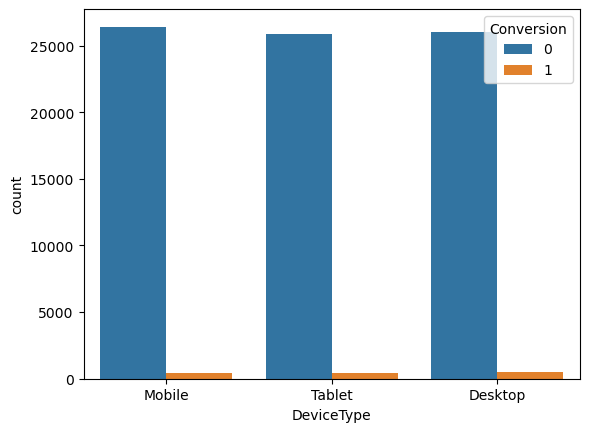

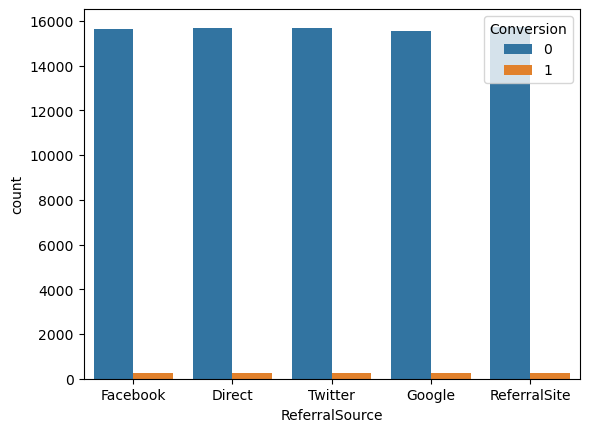

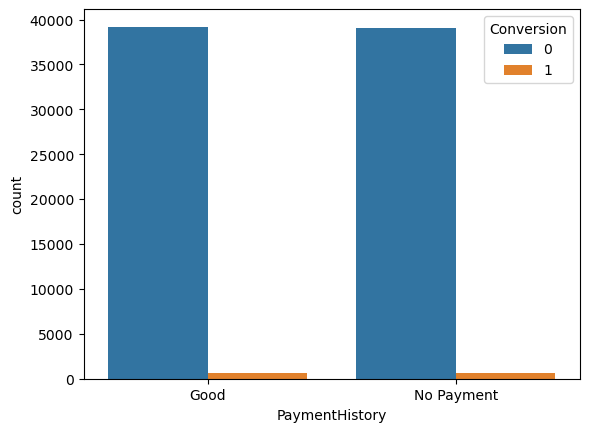

In [24]:
for cat in categorical_columns:
    plot = sns.countplot(x = cat, hue = 'Conversion', data = df_full_train_cleaned)
    if cat == "Location":
        plt.setp(plot.get_xticklabels(), rotation=45)
    plt.show()
    print()

#### Features importance

##### Numerical features - Using group mean vs global mean

In [25]:
global_conversion = df_full_train_cleaned.Conversion.mean()
global_conversion

0.016177487272955815

In [26]:
for num in numerical_columns:
    df_grouped = df_full_train_cleaned.groupby(['Conversion'], as_index=False).agg({num: ['mean', 'count']}).rename(columns = {'mean' : 'mean', 'count' : 'number'})
    df_grouped.columns = [num, 'mean', 'number']

    print(df_grouped)

   Age       mean  number
0    0  40.033960   78268
1    1  36.936286    1287
   TimeSpentMinutes       mean  number
0                 0  32.462731   78268
1                 1  38.001554    1287
   PagesViewed       mean  number
0            0   8.416377   78268
1            1  13.564880    1287
   EmailSent      mean  number
0          0  4.975839   78268
1          1  6.632479    1287
   FormSubmissions      mean  number
0                0  2.499221   78268
1                1  2.484848    1287
   Downloads      mean  number
0          0  1.500933   78268
1          1  1.501166    1287
   ResponseTimeHours       mean  number
0                  0  12.518143   78268
1                  1  12.382284    1287
   FollowUpEmails      mean  number
0               0  4.966308   78268
1               1  6.146853    1287
   SocialMediaEngagement        mean  number
0                      0  109.664218   78268
1                      1  109.205905    1287


##### Numerical features - Using pearson correlation

In [27]:
coeff_corr = df_full_train_cleaned[numerical_columns].corrwith(df_full_train_cleaned['Conversion'])
coeff_corr_abs = coeff_corr.abs()
coeff_corr_abs.sort_values(ascending = False)

PagesViewed              0.161228
EmailSent                0.065973
FollowUpEmails           0.047026
TimeSpentMinutes         0.043266
Age                      0.032945
ResponseTimeHours        0.002473
SocialMediaEngagement    0.001113
FormSubmissions          0.001062
Downloads                0.000026
dtype: float64

##### Numerical features - Using MI score

In [28]:
from sklearn.metrics import mutual_info_score
def get_mutual_info_score(serie):
    return mutual_info_score(serie,  df_full_train_cleaned['Conversion'])

In [29]:
mi_scores_numerical_columns = df_full_train_cleaned[numerical_columns].apply(get_mutual_info_score)
df_mi_scores_numerical_columns = pd.DataFrame({'feature_name' : mi_scores_numerical_columns.index, 'mi_score' : mi_scores_numerical_columns.values}) 
df_mi_scores_numerical_columns.sort_values(by = 'mi_score', ascending = False)


,feature_name,mi_score
2,PagesViewed,0.018925
0,Age,0.008444
3,EmailSent,0.002866
1,TimeSpentMinutes,0.001756
7,FollowUpEmails,0.001737
8,SocialMediaEngagement,0.001227
6,ResponseTimeHours,0.000140
4,FormSubmissions,0.000021
5,Downloads,0.000014


In [30]:
top5_numerical_columns = df_mi_scores_numerical_columns[:5]
top5_numerical_columns = top5_numerical_columns.feature_name.unique().tolist()

##### Numerical features - Check multicolinearity

In [31]:
df_full_train_cleaned[numerical_columns].corr()

,Age,TimeSpentMinutes,PagesViewed,EmailSent,FormSubmissions,Downloads,ResponseTimeHours,FollowUpEmails,SocialMediaEngagement
Age,1.000000,-0.002401,0.006060,0.000399,-0.000981,0.004550,-0.005724,0.000260,0.000276
TimeSpentMinutes,-0.002401,1.000000,-0.000723,-0.000690,-0.006869,-0.000362,-0.006771,-0.004158,-0.000628
PagesViewed,0.006060,-0.000723,1.000000,-0.001792,-0.001358,0.001077,0.000202,-0.002584,0.001627
EmailSent,0.000399,-0.000690,-0.001792,1.000000,0.005879,-0.008982,-0.003444,0.006103,-0.004790
FormSubmissions,-0.000981,-0.006869,-0.001358,0.005879,1.000000,0.003852,0.005882,-0.004069,0.002722
Downloads,0.004550,-0.000362,0.001077,-0.008982,0.003852,1.000000,-0.002266,0.003923,0.001403
ResponseTimeHours,-0.005724,-0.006771,0.000202,-0.003444,0.005882,-0.002266,1.000000,-0.004411,0.002806
FollowUpEmails,0.000260,-0.004158,-0.002584,0.006103,-0.004069,0.003923,-0.004411,1.000000,0.000461
SocialMediaEngagement,0.000276,-0.000628,0.001627,-0.004790,0.002722,0.001403,0.002806,0.000461,1.000000


##### Categorical features - Check global conversion rate vs group conversion rate using difference and ratio

In [32]:
df_grouped_all = pd.DataFrame()
for cat in categorical_columns:
    df_grouped = df_full_train_cleaned.groupby([cat], as_index=False).Conversion.mean()
    df_grouped[cat] = df_grouped[cat].apply(lambda row : cat + '_' + row)
    df_grouped['Difference'] = df_grouped['Conversion'] - global_conversion
    df_grouped['Ratio'] = df_grouped['Conversion']/global_conversion
    display(df_grouped)
    df_grouped.rename(columns = {cat : 'categorie', }, inplace = True)
    df_grouped_all = pd.concat([df_grouped_all, df_grouped], axis = 0)
    print()

,Gender,Conversion,Difference,Ratio
0,Gender_Female,0.015908,-0.000270,0.983328
1,Gender_Male,0.016447,0.000269,1.016631


,Location,Conversion,Difference,Ratio
0,Location_Faisalabad,0.000000,-0.016177,0.000000
1,Location_Gujranwala,0.000000,-0.016177,0.000000
2,Location_Islamabad,0.055639,0.039462,3.439303
3,Location_Karachi,0.053281,0.037104,3.293544
4,Location_Lahore,0.052618,0.036441,3.252571
5,Location_Multan,0.000000,-0.016177,0.000000
6,Location_Peshawar,0.000000,-0.016177,0.000000
7,Location_Quetta,0.000000,-0.016177,0.000000
8,Location_Rawalpindi,0.000000,-0.016177,0.000000
9,Location_Sialkot,0.000000,-0.016177,0.000000


,LeadSource,Conversion,Difference,Ratio
0,LeadSource_Email,0.017537,0.001359,1.084023
1,LeadSource_Organic,0.016433,0.000256,1.015814
2,LeadSource_Referral,0.015339,-0.000838,0.948188
3,LeadSource_Social Media,0.015398,-0.000780,0.951800


,LeadStatus,Conversion,Difference,Ratio
0,LeadStatus_Cold,0.009909,-0.006268,0.612528
1,LeadStatus_Hot,0.028825,0.012648,1.781802
2,LeadStatus_Warm,0.009832,-0.006345,0.607787


,DeviceType,Conversion,Difference,Ratio
0,DeviceType_Desktop,0.017625,0.001448,1.089496
1,DeviceType_Mobile,0.014920,-0.001257,0.922292
2,DeviceType_Tablet,0.016000,-0.000177,0.989029


,ReferralSource,Conversion,Difference,Ratio
0,ReferralSource_Direct,0.015581,-0.000597,0.963118
1,ReferralSource_Facebook,0.017025,0.000847,1.052373
2,ReferralSource_Google,0.015705,-0.000472,0.970803
3,ReferralSource_ReferralSite,0.016373,0.000195,1.012083
4,ReferralSource_Twitter,0.016199,0.000021,1.001324


,PaymentHistory,Conversion,Difference,Ratio
0,PaymentHistory_Good,0.015793,-0.000384,0.976252
1,PaymentHistory_No Payment,0.016563,0.000385,1.023807


In [33]:
df_grouped_all['Ratio_relative'] = np.where(df_grouped_all['Ratio'] > 1, df_grouped_all['Ratio'] - 1, np.where(df_grouped_all['Ratio'] == 0., 0, 1 - df_grouped_all['Ratio']))

In [34]:
df_grouped_all.sort_values(by = ['Ratio_relative'], ascending = False).head()

,categorie,Conversion,Difference,Ratio,Ratio_relative
2,Location_Islamabad,0.055639,0.039462,3.439303,2.439303
3,Location_Karachi,0.053281,0.037104,3.293544,2.293544
4,Location_Lahore,0.052618,0.036441,3.252571,2.252571
1,LeadStatus_Hot,0.028825,0.012648,1.781802,0.781802
2,LeadStatus_Warm,0.009832,-0.006345,0.607787,0.392213


In [35]:
features_name = df_grouped_all.query('Ratio_relative > 0.05')['categorie'].tolist()
features_name_unique = [item.split('_')[0] for item in features_name]
features_name_unique = list(set(features_name_unique))
features_name_unique

['LeadSource', 'Location', 'ReferralSource', 'DeviceType', 'LeadStatus']

##### Categorical features - Use mutual information score for features importance

In [36]:
mi_scores_categorical_columns = df_full_train_cleaned[categorical_columns].apply(get_mutual_info_score)
df_mi_scores_categorical_columns = pd.DataFrame({'feature_name' : mi_scores_categorical_columns.index, 'mi_score' : mi_scores_categorical_columns.values}) 
df_mi_scores_categorical_columns.sort_values(by = 'mi_score', ascending = False)

,feature_name,mi_score
1,Location,0.019770
3,LeadStatus,0.002327
4,DeviceType,0.000039
2,LeadSource,0.000025
5,ReferralSource,0.000008
6,PaymentHistory,0.000005
0,Gender,0.000002


In [37]:
top5_categorical_columns = df_mi_scores_categorical_columns[:5]
top5_categorical_columns = top5_categorical_columns.feature_name.unique().tolist()

#### Features transformation : onehotencoding for categorical features and standard scaler for numerical features

##### Categorical features

In [38]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output = False, drop = 'first', handle_unknown='ignore')
full_train_categorical_features = encoder.fit_transform(df_full_train_cleaned[categorical_columns])
df_full_train_categorical_encoded_features = pd.DataFrame(full_train_categorical_features, columns = encoder.get_feature_names_out(categorical_columns))
df_full_train_categorical_encoded_features.head()

,Gender_Male,Location_Gujranwala,Location_Islamabad,Location_Karachi,Location_Lahore,Location_Multan,Location_Peshawar,Location_Quetta,Location_Rawalpindi,Location_Sialkot,...,LeadSource_Social Media,LeadStatus_Hot,LeadStatus_Warm,DeviceType_Mobile,DeviceType_Tablet,ReferralSource_Facebook,ReferralSource_Google,ReferralSource_ReferralSite,ReferralSource_Twitter,PaymentHistory_No Payment
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


##### Numerical features

In [39]:
from sklearn.preprocessing import StandardScaler
scaler_bl = StandardScaler()
full_train_numerical_features = scaler_bl.fit_transform(df_full_train_cleaned[numerical_columns])
df_full_train_numerical_scaled_features = pd.DataFrame(full_train_numerical_features, columns = numerical_columns)
df_full_train_numerical_scaled_features.head()

,Age,TimeSpentMinutes,PagesViewed,EmailSent,FormSubmissions,Downloads,ResponseTimeHours,FollowUpEmails,SocialMediaEngagement
0,0.675784,1.204143,1.117096,-1.263488,-0.292194,-1.344366,-1.517069,-1.574130,1.508435
1,-0.167244,0.275386,-0.372255,-0.947825,-0.292194,1.342689,1.656732,-1.258382,1.604706
2,1.265904,1.266060,1.117096,-0.316497,-0.877768,1.342689,0.502623,-0.311140,1.585451
3,-0.925969,0.399221,-1.613381,-1.263488,-0.877768,0.447004,-0.507223,0.951850,-0.378476
4,1.518812,0.832640,0.124195,-0.316497,0.293379,0.447004,-0.940014,1.267598,-0.224442


In [40]:
df_full_train_cleaned_transformed = pd.concat([df_full_train_numerical_scaled_features, df_full_train_categorical_encoded_features, df_full_train_cleaned['Conversion']], axis = 1, ignore_index=False)
df_full_train_cleaned_transformed.head()

,Age,TimeSpentMinutes,PagesViewed,EmailSent,FormSubmissions,Downloads,ResponseTimeHours,FollowUpEmails,SocialMediaEngagement,Gender_Male,...,LeadStatus_Hot,LeadStatus_Warm,DeviceType_Mobile,DeviceType_Tablet,ReferralSource_Facebook,ReferralSource_Google,ReferralSource_ReferralSite,ReferralSource_Twitter,PaymentHistory_No Payment,Conversion
0,0.675784,1.204143,1.117096,-1.263488,-0.292194,-1.344366,-1.517069,-1.574130,1.508435,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,-0.167244,0.275386,-0.372255,-0.947825,-0.292194,1.342689,1.656732,-1.258382,1.604706,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.265904,1.266060,1.117096,-0.316497,-0.877768,1.342689,0.502623,-0.311140,1.585451,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,-0.925969,0.399221,-1.613381,-1.263488,-0.877768,0.447004,-0.507223,0.951850,-0.378476,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
4,1.518812,0.832640,0.124195,-0.316497,0.293379,0.447004,-0.940014,1.267598,-0.224442,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


##### Features importance based on random forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

X_rf_fs = df_full_train_cleaned_transformed.drop(columns = ['Conversion'])
y_rf_fs = df_full_train_cleaned_transformed['Conversion']


# Split the data into training and test sets (not strictly necessary here but follows typical workflow)
X_train_rf_fs, X_test_rf_fs, y_train_rf_fs, y_test_rf_fs = train_test_split(X_rf_fs, y_rf_fs, test_size=0.2, random_state=42)

# Initialize and fit the random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_rf_fs, y_train_rf_fs)

# Get feature importance
feature_importances = rf.feature_importances_

# Create a DataFrame to visualize feature importance
feature_importances_df = pd.DataFrame({'Feature': X_rf_fs.columns, 'Importance': feature_importances})
feature_importances_df.sort_values(by='Importance', ascending=False, inplace=True)

# Select top features based on importance
top_features = feature_importances_df[feature_importances_df['Importance'] >= 0.02]['Feature'].tolist()

print('top features', top_features)
print('all features', X_rf_fs.columns)

top features ['PagesViewed', 'Age', 'EmailSent', 'TimeSpentMinutes', 'FollowUpEmails', 'SocialMediaEngagement', 'Location_Islamabad', 'Location_Lahore', 'Location_Karachi', 'ResponseTimeHours', 'LeadStatus_Hot', 'FormSubmissions', 'Downloads']
all features Index(['Age', 'TimeSpentMinutes', 'PagesViewed', 'EmailSent',
       'FormSubmissions', 'Downloads', 'ResponseTimeHours', 'FollowUpEmails',
       'SocialMediaEngagement', 'Gender_Male', 'Location_Gujranwala',
       'Location_Islamabad', 'Location_Karachi', 'Location_Lahore',
       'Location_Multan', 'Location_Peshawar', 'Location_Quetta',
       'Location_Rawalpindi', 'Location_Sialkot', 'LeadSource_Organic',
       'LeadSource_Referral', 'LeadSource_Social Media', 'LeadStatus_Hot',
       'LeadStatus_Warm', 'DeviceType_Mobile', 'DeviceType_Tablet',
       'ReferralSource_Facebook', 'ReferralSource_Google',
       'ReferralSource_ReferralSite', 'ReferralSource_Twitter',
       'PaymentHistory_No Payment'],
      dtype='object')


#### Model baseline building - Use all features

Imbalanced data is a common problem on machine learning, there are differents ways to handle imbalanced data such as using resampling techniques, using oversampling and so one.
Also use appropriate evaluation techniques can be bypass the problem.

##### Random forest, Logistic regression and Decision trees

In [42]:
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

rf = RandomForestClassifier(n_estimators=100)  # 100 trees in the forest
lr = LogisticRegression()
dt = DecisionTreeClassifier()

In [43]:
X_train = df_full_train_cleaned_transformed.drop(columns = ['Conversion'])
y_train = df_full_train_cleaned_transformed['Conversion']

In [44]:
rf_model = rf.fit(X_train,y_train)
lr_model = lr.fit(X_train,y_train)
dt_model = dt.fit(X_train,y_train)

##### Model evalutation on training data

In [45]:
# Predict the response for test dataset
y_train_pred_rf = rf_model.predict(X_train)
y_train_pred_lr = lr_model.predict(X_train)
y_train_pred_dt = dt_model.predict(X_train)


In [46]:
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, confusion_matrix

precision_rf_train, recall_rf_train, f1_rf_train, _ = precision_recall_fscore_support(y_train, y_train_pred_dt, average='binary')
auc_roc_rf_train = roc_auc_score(y_train, y_train_pred_dt)
conf_matrix_rf_train = confusion_matrix(y_train, y_train_pred_dt)

precision_lr_train, recall_lr_train, f1_lr_train, _ = precision_recall_fscore_support(y_train, y_train_pred_dt, average='binary')
auc_roc_lr_train = roc_auc_score(y_train, y_train_pred_dt)
conf_matrix_lr_train = confusion_matrix(y_train, y_train_pred_dt)

precision_dt_train, recall_dt_train, f1_dt_train, _ = precision_recall_fscore_support(y_train, y_train_pred_dt, average='binary')
auc_roc_dt_train = roc_auc_score(y_train, y_train_pred_dt)
conf_matrix_dt_train = confusion_matrix(y_train, y_train_pred_dt)

print("RF Model")
print(f"Precision: {precision_rf_train}, Recall: {recall_rf_train}, F1: {f1_rf_train}")
print(f"AUC-ROC: {auc_roc_rf_train}")
print("Confusion Matrix:")
print(conf_matrix_rf_train)
print("**********************")

print("LR Model")
print(f"Precision: {precision_lr_train}, Recall: {recall_lr_train}, F1: {f1_lr_train}")
print(f"AUC-ROC: {auc_roc_lr_train}")
print("Confusion Matrix:")
print(conf_matrix_lr_train)
print("**********************")


print("DT Model")
print(f"Precision: {precision_dt_train}, Recall: {recall_dt_train}, F1: {f1_dt_train}")
print(f"AUC-ROC: {auc_roc_dt_train}")
print("Confusion Matrix:")
print(conf_matrix_dt_train)
print("**********************")


RF Model
Precision: 1.0, Recall: 1.0, F1: 1.0
AUC-ROC: 1.0
Confusion Matrix:
[[78268     0]
 [    0  1287]]
**********************
LR Model
Precision: 1.0, Recall: 1.0, F1: 1.0
AUC-ROC: 1.0
Confusion Matrix:
[[78268     0]
 [    0  1287]]
**********************
DT Model
Precision: 1.0, Recall: 1.0, F1: 1.0
AUC-ROC: 1.0
Confusion Matrix:
[[78268     0]
 [    0  1287]]
**********************


##### Model evalutation on validation data

In [47]:
df_validation.drop(columns = ['LeadID'], inplace = True)

In [48]:
df_validation.reset_index(drop = True, inplace = True)

In [49]:
validation_categorical_features_encoded = encoder.transform(df_validation[categorical_columns])
df_validation_categorical_features_encoded = pd.DataFrame(validation_categorical_features_encoded, columns = encoder.get_feature_names_out(categorical_columns))
df_validation_categorical_features_encoded.head()

,Gender_Male,Location_Gujranwala,Location_Islamabad,Location_Karachi,Location_Lahore,Location_Multan,Location_Peshawar,Location_Quetta,Location_Rawalpindi,Location_Sialkot,...,LeadSource_Social Media,LeadStatus_Hot,LeadStatus_Warm,DeviceType_Mobile,DeviceType_Tablet,ReferralSource_Facebook,ReferralSource_Google,ReferralSource_ReferralSite,ReferralSource_Twitter,PaymentHistory_No Payment
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [50]:
validation_numerical_featues = scaler_bl.transform(df_validation[numerical_columns])
df_validation_numerical_features_scaled = pd.DataFrame(validation_numerical_featues, columns = numerical_columns)
df_validation_numerical_features_scaled.head()

,Age,TimeSpentMinutes,PagesViewed,EmailSent,FormSubmissions,Downloads,ResponseTimeHours,FollowUpEmails,SocialMediaEngagement
0,-0.588758,0.708806,1.365322,1.261822,0.878953,-0.448681,-0.795751,-1.574130,1.046334
1,0.169967,0.584972,-1.365156,-1.579152,0.878953,-1.344366,0.935414,-1.574130,0.237658
2,0.001362,0.213469,0.868871,1.261822,0.878953,-0.448681,-0.651487,-1.574130,-1.495219
3,0.338573,0.708806,1.365322,-0.000833,0.878953,1.342689,0.069832,0.320355,-1.360439
4,0.591481,1.575645,-1.116931,1.261822,-0.877768,0.447004,-0.940014,0.951850,0.699759


In [51]:
df_validation_transformed = pd.concat([df_validation_numerical_features_scaled, df_validation_categorical_features_encoded, df_validation['Conversion']], axis = 1, )
df_validation_transformed.head()

,Age,TimeSpentMinutes,PagesViewed,EmailSent,FormSubmissions,Downloads,ResponseTimeHours,FollowUpEmails,SocialMediaEngagement,Gender_Male,...,LeadStatus_Hot,LeadStatus_Warm,DeviceType_Mobile,DeviceType_Tablet,ReferralSource_Facebook,ReferralSource_Google,ReferralSource_ReferralSite,ReferralSource_Twitter,PaymentHistory_No Payment,Conversion
0,-0.588758,0.708806,1.365322,1.261822,0.878953,-0.448681,-0.795751,-1.574130,1.046334,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1
1,0.169967,0.584972,-1.365156,-1.579152,0.878953,-1.344366,0.935414,-1.574130,0.237658,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,0.001362,0.213469,0.868871,1.261822,0.878953,-0.448681,-0.651487,-1.574130,-1.495219,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,0.338573,0.708806,1.365322,-0.000833,0.878953,1.342689,0.069832,0.320355,-1.360439,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0
4,0.591481,1.575645,-1.116931,1.261822,-0.877768,0.447004,-0.940014,0.951850,0.699759,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0


In [52]:
df_validation_transformed.Conversion.mean(), df_full_train_cleaned_transformed.Conversion.mean()

(0.01735, 0.016177487272955815)

In [53]:
X_validation = df_validation_transformed.drop(columns = ['Conversion'])
y_validation = df_validation_transformed['Conversion']

In [54]:
# Predict the response for test dataset
y_validation_pred_rf = rf_model.predict(X_validation)
y_validation_pred_lr = lr_model.predict(X_validation)
y_validation_pred_dt = dt_model.predict(X_validation)


In [55]:
y_validation_pred_rf.shape, X_validation.shape

((20000,), (20000, 31))

In [56]:
precision_validation_rf, recall_validation_rf, f1_validation_rf, _ = precision_recall_fscore_support(y_validation, y_validation_pred_rf, average='binary')
auc_roc_validation_rf = roc_auc_score(y_validation, y_validation_pred_rf)
conf_matrix_validation_rf = confusion_matrix(y_validation, y_validation_pred_rf)

precision_validation_lr, recall_validation_lr, f1_validation_lr, _ = precision_recall_fscore_support(y_validation, y_validation_pred_lr, average='binary')
auc_roc_validation_lr = roc_auc_score(y_validation, y_validation_pred_lr)
conf_matrix_validation_lr = confusion_matrix(y_validation, y_validation_pred_lr)

precision_validation_dt, recall_validation_dt, f1_validation_dt, _ = precision_recall_fscore_support(y_validation, y_validation_pred_dt, average='binary')
auc_roc_validation_dt = roc_auc_score(y_validation, y_validation_pred_dt)
conf_matrix_validation_dt = confusion_matrix(y_validation, y_validation_pred_dt)

print("RF Model")
print(f"Precision: {precision_validation_rf}, Recall: {recall_validation_rf}, F1: {f1_validation_rf}")
print(f"AUC-ROC: {auc_roc_validation_rf}")
print("Confusion Matrix:")
print(conf_matrix_validation_rf)
print("**********************")

print("LR Model")
print(f"Precision: {precision_validation_lr}, Recall: {recall_validation_lr}, F1: {f1_validation_lr}")
print(f"AUC-ROC: {auc_roc_validation_lr}")
print("Confusion Matrix:")
print(conf_matrix_validation_lr)
print("**********************")


print("DT Model")
print(f"Precision: {precision_validation_dt}, Recall: {recall_validation_dt}, F1: {f1_validation_dt}")
print(f"AUC-ROC: {auc_roc_validation_dt}")
print("Confusion Matrix:")
print(conf_matrix_validation_dt)
print("**********************")


RF Model
Precision: 1.0, Recall: 0.7319884726224783, F1: 0.8452579034941764
AUC-ROC: 0.8659942363112392
Confusion Matrix:
[[19653     0]
 [   93   254]]
**********************
LR Model
Precision: 0.59375, Recall: 0.21902017291066284, F1: 0.32
AUC-ROC: 0.6081871332166402
Confusion Matrix:
[[19601    52]
 [  271    76]]
**********************
DT Model
Precision: 1.0, Recall: 0.9942363112391931, F1: 0.9971098265895955
AUC-ROC: 0.9971181556195965
Confusion Matrix:
[[19653     0]
 [    2   345]]
**********************


##### Model evalutation on test data

In [57]:
df_test.drop(columns = ['LeadID'], inplace = True)
df_test.reset_index(drop = True, inplace = True)

test_categorical_features_encoded = encoder.transform(df_test[categorical_columns])
df_test_categorical_features_encoded = pd.DataFrame(test_categorical_features_encoded, columns = encoder.get_feature_names_out(categorical_columns))
df_test_categorical_features_encoded.head()

test_numerical_featues = scaler_bl.transform(df_test[numerical_columns])
df_test_numerical_features_scaled = pd.DataFrame(test_numerical_featues, columns = numerical_columns)
df_test_numerical_features_scaled.head()

df_test_transformed = pd.concat([df_test_numerical_features_scaled, df_test_categorical_features_encoded, df_test['Conversion']], axis = 1, )
df_test_transformed.head()

X_test = df_test_transformed.drop(columns = ['Conversion'])
y_test = df_test_transformed['Conversion']

In [58]:
# Predict the response for test dataset
y_test_pred_rf = rf_model.predict(X_test)
y_test_pred_lr = lr_model.predict(X_test)
y_test_pred_dt = dt_model.predict(X_test)

In [59]:
precision_test_rf, recall_test_rf, f1_test_rf, _ = precision_recall_fscore_support(y_test, y_test_pred_rf, average='binary')
auc_roc_test_rf = roc_auc_score(y_test, y_test_pred_rf)
conf_matrix_test_rf = confusion_matrix(y_test, y_test_pred_rf)

precision_test_lr, recall_test_lr, f1_test_lr, _ = precision_recall_fscore_support(y_test, y_test_pred_lr, average='binary')
auc_roc_test_lr = roc_auc_score(y_test, y_test_pred_lr)
conf_matrix_test_lr = confusion_matrix(y_test, y_test_pred_lr)

# precision_test_dt, recall_test_dt, f1_test_dt, _ = precision_recall_fscore_support(y_test, y_test_pred_dt, average='binary')
auc_roc_test_dt = roc_auc_score(y_test, y_test_pred_dt)
conf_matrix_test_dt = confusion_matrix(y_test, y_test_pred_dt)

print("RF Model")
print(f"Precision: {precision_test_rf}, Recall: {recall_test_rf}, F1: {f1_test_rf}")
print(f"AUC-ROC: {auc_roc_test_rf}")
print("Confusion Matrix:")
print(conf_matrix_test_rf)
print("**********************")

print("LR Model")
print(f"Precision: {precision_test_lr}, Recall: {recall_test_lr}, F1: {f1_test_lr}")
print(f"AUC-ROC: {auc_roc_test_lr}")
print("Confusion Matrix:")
print(conf_matrix_test_lr)
print("**********************")

# print("DT Model")
# print(f"Precision: {precision_test_dt}, Recall: {recall_test_dt}, F1: {f1_test_dt}")
print(f"AUC-ROC: {auc_roc_test_dt}")
print("Confusion Matrix:")
print(conf_matrix_test_dt)
# print("**********************")


RF Model
Precision: 1.0, Recall: 0.7602905569007264, F1: 0.8638239339752408
AUC-ROC: 0.8801452784503632
Confusion Matrix:
[[25732     0]
 [   99   314]]
**********************
LR Model
Precision: 0.4868421052631579, Recall: 0.1791767554479419, F1: 0.26194690265486725
AUC-ROC: 0.5880727551528533
Confusion Matrix:
[[25654    78]
 [  339    74]]
**********************
AUC-ROC: 0.9975786924939467
Confusion Matrix:
[[25732     0]
 [    2   411]]


##### Dealing with imbalanced class - part 2

In [60]:
df_full_train_cleaned.columns

Index(['Age', 'Gender', 'Location', 'LeadSource', 'TimeSpentMinutes',
       'PagesViewed', 'LeadStatus', 'EmailSent', 'DeviceType',
       'ReferralSource', 'FormSubmissions', 'Downloads', 'CTR_ProductPage',
       'ResponseTimeHours', 'FollowUpEmails', 'SocialMediaEngagement',
       'PaymentHistory', 'Conversion'],
      dtype='object')

In [61]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[1, 2, 3, 6, 8, 9, 16], random_state=42, sampling_strategy=.5)
X_full_train_resampled, y_full_train_resampled = smote_nc.fit_resample(df_full_train_cleaned.drop(columns = ['Conversion']), df_full_train_cleaned['Conversion'])

In [62]:
y_full_train_resampled.value_counts(normalize = True), y_full_train_resampled.mean(), global_conversion

(Conversion
 0    0.666667
 1    0.333333
 Name: proportion, dtype: float64,
 0.3333333333333333,
 0.016177487272955815)

In [63]:
X_full_train_resampled.shape, df_full_train_cleaned.shape

((117402, 17), (79555, 18))

In [64]:
full_train_resampled_categorical_features = encoder.fit_transform(X_full_train_resampled[categorical_columns])
df_full_train_resampled_categorical_features = pd.DataFrame(full_train_resampled_categorical_features, columns = encoder.get_feature_names_out(categorical_columns))
df_full_train_resampled_categorical_features.head()

,Gender_Male,Location_Gujranwala,Location_Islamabad,Location_Karachi,Location_Lahore,Location_Multan,Location_Peshawar,Location_Quetta,Location_Rawalpindi,Location_Sialkot,...,LeadSource_Social Media,LeadStatus_Hot,LeadStatus_Warm,DeviceType_Mobile,DeviceType_Tablet,ReferralSource_Facebook,ReferralSource_Google,ReferralSource_ReferralSite,ReferralSource_Twitter,PaymentHistory_No Payment
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [65]:
full_train_resampled_numerical_features = scaler_bl.fit_transform(X_full_train_resampled[numerical_columns])
df_full_train_resampled_numerical_features = pd.DataFrame(full_train_resampled_numerical_features, columns = numerical_columns)
df_full_train_resampled_numerical_features.head()

,Age,TimeSpentMinutes,PagesViewed,EmailSent,FormSubmissions,Downloads,ResponseTimeHours,FollowUpEmails,SocialMediaEngagement
0,0.867084,1.128533,0.741919,-1.461267,-0.227752,-1.283656,-1.517441,-1.771631,1.512982
1,-0.082639,0.177560,-0.749860,-1.129189,-0.227752,1.516228,1.716481,-1.432906,1.609171
2,1.531891,1.191931,0.741919,-0.465034,-0.843336,1.516228,0.540509,-0.416731,1.589933
3,-0.937390,0.304357,-1.993009,-1.461267,-0.843336,0.582934,-0.488466,0.938168,-0.372325
4,1.816808,0.748144,-0.252601,-0.465034,0.387832,0.582934,-0.929455,1.276893,-0.218422


In [66]:
df_full_train_resampled_transformed = pd.concat([df_full_train_resampled_numerical_features, df_full_train_resampled_categorical_features, y_full_train_resampled], axis = 1, ignore_index=False)
df_full_train_resampled_transformed.head()

,Age,TimeSpentMinutes,PagesViewed,EmailSent,FormSubmissions,Downloads,ResponseTimeHours,FollowUpEmails,SocialMediaEngagement,Gender_Male,...,LeadStatus_Hot,LeadStatus_Warm,DeviceType_Mobile,DeviceType_Tablet,ReferralSource_Facebook,ReferralSource_Google,ReferralSource_ReferralSite,ReferralSource_Twitter,PaymentHistory_No Payment,Conversion
0,0.867084,1.128533,0.741919,-1.461267,-0.227752,-1.283656,-1.517441,-1.771631,1.512982,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,-0.082639,0.177560,-0.749860,-1.129189,-0.227752,1.516228,1.716481,-1.432906,1.609171,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.531891,1.191931,0.741919,-0.465034,-0.843336,1.516228,0.540509,-0.416731,1.589933,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,-0.937390,0.304357,-1.993009,-1.461267,-0.843336,0.582934,-0.488466,0.938168,-0.372325,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
4,1.816808,0.748144,-0.252601,-0.465034,0.387832,0.582934,-0.929455,1.276893,-0.218422,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [67]:
X_train_resampled = df_full_train_resampled_transformed.drop(columns = ['Conversion'])
y_train_resampled = df_full_train_resampled_transformed['Conversion']

In [68]:
rf_model_bl = rf.fit(X_train_resampled, y_train_resampled)
lr_model_bl = lr.fit(X_train_resampled, y_train_resampled)
dt_model_bl = dt.fit(X_train_resampled, y_train_resampled)

In [69]:
# Predict the response for test dataset
y_pred_rf_bl = rf_model_bl.predict(X_test)
y_pred_lr_bl = lr_model_bl.predict(X_test)
y_pred_dt_bl = dt_model_bl.predict(X_test)

In [70]:
precision_rf_bl, recall_rf_bl, f1_rf_bl, _ = precision_recall_fscore_support(y_test, y_pred_rf_bl, average='binary')
auc_roc_rf_bl = roc_auc_score(y_test, y_pred_rf_bl)
conf_matrix_rf_bl = confusion_matrix(y_test, y_pred_rf_bl)

precision_lr_bl, recall_lr_bl, f1_lr_bl, _ = precision_recall_fscore_support(y_test, y_pred_lr_bl, average='binary')
auc_roc_lr_bl = roc_auc_score(y_test, y_pred_lr_bl)
conf_matrix_lr_bl = confusion_matrix(y_test, y_pred_lr_bl)

precision_dt_bl, recall_dt_bl, f1_dt_bl, _ = precision_recall_fscore_support(y_test, y_pred_dt_bl, average='binary')
auc_roc_dt_bl = roc_auc_score(y_test, y_pred_dt_bl)
conf_matrix_dt_bl = confusion_matrix(y_test, y_pred_dt_bl)

print("RF Model")
print(f"Precision: {precision_rf_bl}, Recall: {recall_rf_bl}, F1: {f1_rf_bl}")
print(f"AUC-ROC: {auc_roc_rf_bl}")
print("Confusion Matrix:")
print(conf_matrix_rf_bl)
print("**********************")

print("LR Model")
print(f"Precision: {precision_lr_bl}, Recall: {recall_lr_bl}, F1: {f1_lr_bl}")
print(f"AUC-ROC: {auc_roc_lr_bl}")
print("Confusion Matrix:")
print(conf_matrix_lr_bl)
print("**********************")


print("DT Model")
print(f"Precision: {precision_dt_bl}, Recall: {recall_dt_bl}, F1: {f1_dt_bl}")
print(f"AUC-ROC: {auc_roc_dt_bl}")
print("Confusion Matrix:")
print(conf_matrix_dt_bl)
print("**********************")


RF Model
Precision: 0.527599486521181, Recall: 0.9951573849878934, F1: 0.6895973154362417
AUC-ROC: 0.990428062927648
Confusion Matrix:
[[25364   368]
 [    2   411]]
**********************
LR Model
Precision: 0.14548022598870056, Recall: 0.9975786924939467, F1: 0.2539291217257319
AUC-ROC: 0.9517661844251173
Confusion Matrix:
[[23312  2420]
 [    1   412]]
**********************
DT Model
Precision: 0.4351747463359639, Recall: 0.9346246973365617, F1: 0.5938461538461539
AUC-ROC: 0.9575773883076405
Confusion Matrix:
[[25231   501]
 [   27   386]]
**********************


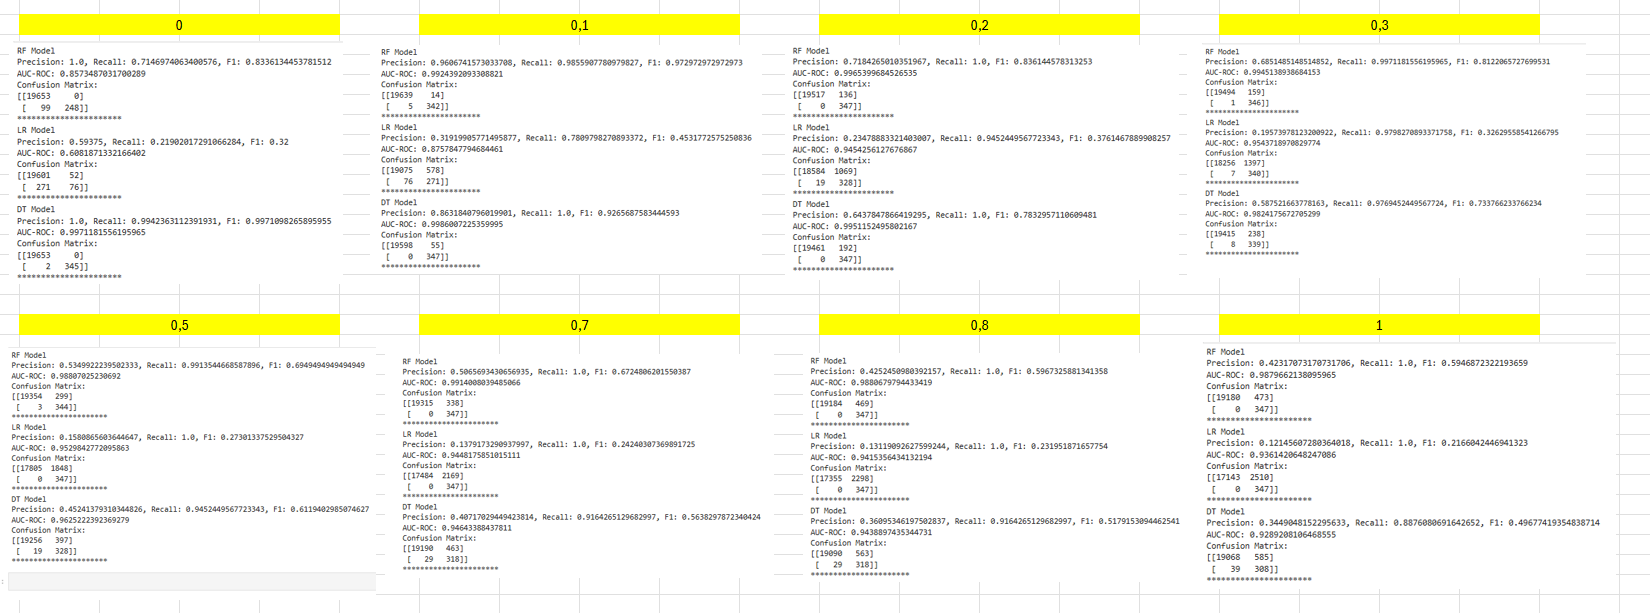

In [72]:
from PIL import Image
from IPython.display import display
display(Image.open('img/oversampling.PNG'))


#### Building model with random forest selected features

In [73]:
top_numerical_columns = ['PagesViewed', 'Age', 'EmailSent', 'TimeSpentMinutes', 'FollowUpEmails', 'SocialMediaEngagement', 'FormSubmissions', 'Downloads', 'ResponseTimeHours',] 
top_categorical_columns = ['Location', 'LeadStatus',]

In [74]:
df_full_train_cleaned_selected = pd.concat([df_full_train_cleaned[top_numerical_columns], df_full_train_cleaned[top_categorical_columns], df_full_train_cleaned[['Conversion']]], axis = 1)
df_full_train_cleaned_selected.head()

,PagesViewed,Age,EmailSent,TimeSpentMinutes,FollowUpEmails,SocialMediaEngagement,FormSubmissions,Downloads,ResponseTimeHours,Location,LeadStatus,Conversion
0,13,48,1,52,0,188,2,0,2,Quetta,Cold,0
1,7,38,2,37,1,193,2,3,24,Sialkot,Hot,0
2,13,55,4,53,4,192,1,3,16,Multan,Cold,0
3,2,29,1,39,8,90,1,2,9,Sialkot,Warm,0
4,9,58,4,46,9,98,3,2,6,Islamabad,Hot,0


##### Categorical features transformation

In [75]:
encoder_new = OneHotEncoder(sparse_output = False, drop = 'first', handle_unknown='ignore')
full_train_cleaned_selected_categorical_features = encoder_new.fit_transform(df_full_train_cleaned_selected[top_categorical_columns])
df_full_train_cleaned_selected_categorical_features = pd.DataFrame(full_train_cleaned_selected_categorical_features, columns = encoder_new.get_feature_names_out(top_categorical_columns))
df_full_train_cleaned_selected_categorical_features.head()

,Location_Gujranwala,Location_Islamabad,Location_Karachi,Location_Lahore,Location_Multan,Location_Peshawar,Location_Quetta,Location_Rawalpindi,Location_Sialkot,LeadStatus_Hot,LeadStatus_Warm
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


##### Numerical features transformation

In [76]:
scaler_new = StandardScaler()
full_train_cleaned_selected_numerical_features = scaler_new.fit_transform(df_full_train_cleaned_selected[top_numerical_columns])
df_full_train_cleaned_selected_numerical_features = pd.DataFrame(full_train_cleaned_selected_numerical_features, columns = top_numerical_columns)
df_full_train_cleaned_selected_numerical_features.head()

,PagesViewed,Age,EmailSent,TimeSpentMinutes,FollowUpEmails,SocialMediaEngagement,FormSubmissions,Downloads,ResponseTimeHours
0,1.117096,0.675784,-1.263488,1.204143,-1.574130,1.508435,-0.292194,-1.344366,-1.517069
1,-0.372255,-0.167244,-0.947825,0.275386,-1.258382,1.604706,-0.292194,1.342689,1.656732
2,1.117096,1.265904,-0.316497,1.266060,-0.311140,1.585451,-0.877768,1.342689,0.502623
3,-1.613381,-0.925969,-1.263488,0.399221,0.951850,-0.378476,-0.877768,0.447004,-0.507223
4,0.124195,1.518812,-0.316497,0.832640,1.267598,-0.224442,0.293379,0.447004,-0.940014


In [77]:
df_full_train_cleaned_selected_transformed = pd.concat([df_full_train_cleaned_selected_numerical_features, df_full_train_cleaned_selected_categorical_features, df_full_train_cleaned_selected['Conversion']], axis = 1)
df_full_train_cleaned_selected_transformed.head()

,PagesViewed,Age,EmailSent,TimeSpentMinutes,FollowUpEmails,SocialMediaEngagement,FormSubmissions,Downloads,ResponseTimeHours,Location_Gujranwala,...,Location_Karachi,Location_Lahore,Location_Multan,Location_Peshawar,Location_Quetta,Location_Rawalpindi,Location_Sialkot,LeadStatus_Hot,LeadStatus_Warm,Conversion
0,1.117096,0.675784,-1.263488,1.204143,-1.574130,1.508435,-0.292194,-1.344366,-1.517069,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,-0.372255,-0.167244,-0.947825,0.275386,-1.258382,1.604706,-0.292194,1.342689,1.656732,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
2,1.117096,1.265904,-0.316497,1.266060,-0.311140,1.585451,-0.877768,1.342689,0.502623,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,-1.613381,-0.925969,-1.263488,0.399221,0.951850,-0.378476,-0.877768,0.447004,-0.507223,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
4,0.124195,1.518812,-0.316497,0.832640,1.267598,-0.224442,0.293379,0.447004,-0.940014,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


##### Preparing dataset

In [78]:
X_train_selected = df_full_train_cleaned_selected_transformed.drop(columns = ['Conversion'])
y_train_selected = df_full_train_cleaned_selected_transformed['Conversion']

In [79]:
df_validation_selected = pd.concat([df_validation[top_numerical_columns], df_validation[top_categorical_columns]], axis = 1)
validation_selected_numerical_features = scaler_new.transform(df_validation_selected[top_numerical_columns])
df_validation_selected_numerical_features = pd.DataFrame(validation_selected_numerical_features, columns = top_numerical_columns)
validation_selected_categorical_features = encoder_new.transform(df_validation_selected[top_categorical_columns])
df_validation_selected_categorical_features = pd.DataFrame(validation_selected_categorical_features, columns = encoder_new.get_feature_names_out(top_categorical_columns))
df_validation_transformed = pd.concat([df_validation_selected_numerical_features, df_validation_selected_categorical_features, df_validation['Conversion']], axis = 1)
df_validation_transformed.head()

,PagesViewed,Age,EmailSent,TimeSpentMinutes,FollowUpEmails,SocialMediaEngagement,FormSubmissions,Downloads,ResponseTimeHours,Location_Gujranwala,...,Location_Karachi,Location_Lahore,Location_Multan,Location_Peshawar,Location_Quetta,Location_Rawalpindi,Location_Sialkot,LeadStatus_Hot,LeadStatus_Warm,Conversion
0,1.365322,-0.588758,1.261822,0.708806,-1.574130,1.046334,0.878953,-0.448681,-0.795751,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,-1.365156,0.169967,-1.579152,0.584972,-1.574130,0.237658,0.878953,-1.344366,0.935414,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,0.868871,0.001362,1.261822,0.213469,-1.574130,-1.495219,0.878953,-0.448681,-0.651487,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,1.365322,0.338573,-0.000833,0.708806,0.320355,-1.360439,0.878953,1.342689,0.069832,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,-1.116931,0.591481,1.261822,1.575645,0.951850,0.699759,-0.877768,0.447004,-0.940014,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0


In [80]:
X_validation_selected = df_validation_transformed.drop(columns = ['Conversion'])
y_validation_selected = df_validation_transformed['Conversion']

##### Building models

In [81]:
rf_model_selected = rf.fit(X_train_selected, y_train_selected)
lr_model_selected = lr.fit(X_train_selected, y_train_selected)
dt_model_selected = dt.fit(X_train_selected, y_train_selected)

##### Evaluating models on training data

In [82]:
# Predict the response for test dataset
y_train_selected_pred_rf = rf_model_selected.predict(X_train_selected)
y_train_selected_pred_lr = lr_model_selected.predict(X_train_selected)
y_train_selected_pred_dt = dt_model_selected.predict(X_train_selected)

In [83]:
precision_rf_train_selected, recall_rf_train_selected, f1_rf_train_selected, _ = precision_recall_fscore_support(y_train_selected, y_train_selected_pred_rf, average='binary')
auc_roc_rf_train_selected = roc_auc_score(y_train_selected, y_train_selected_pred_rf)
conf_matrix_rf_train_selected = confusion_matrix(y_train_selected, y_train_selected_pred_rf)

precision_lr_train_selected, recall_lr_train_selected, f1_lr_train_selected, _ = precision_recall_fscore_support(y_train_selected, y_train_selected_pred_lr, average='binary')
auc_roc_lr_train_selected = roc_auc_score(y_train_selected, y_train_selected_pred_lr)
conf_matrix_lr_train_selected = confusion_matrix(y_train_selected, y_train_selected_pred_lr)

precision_dt_train_selected, recall_dt_train_selected, f1_dt_train_selected, _ = precision_recall_fscore_support(y_train_selected, y_train_selected_pred_dt, average='binary')
auc_roc_dt_train_selected = roc_auc_score(y_train_selected, y_train_selected_pred_dt)
conf_matrix_dt_train_selected = confusion_matrix(y_train_selected, y_train_selected_pred_dt)

print("RF Model with selected features")
print(f"Precision: {precision_rf_train_selected}, Recall: {recall_rf_train_selected}, F1: {f1_rf_train_selected}")
print(f"AUC-ROC: {auc_roc_rf_train_selected}")
print("Confusion Matrix:")
print(conf_matrix_rf_train_selected)
print("**********************")

print("LR Model with selected features")
print(f"Precision: {precision_lr_train_selected}, Recall: {recall_lr_train_selected}, F1: {f1_lr_train_selected}")
print(f"AUC-ROC: {auc_roc_lr_train_selected}")
print("Confusion Matrix:")
print(conf_matrix_lr_train_selected)
print("**********************")


print("DT Model with selected features")
print(f"Precision: {precision_dt_train_selected}, Recall: {recall_dt_train_selected}, F1: {f1_dt_train_selected}")
print(f"AUC-ROC: {auc_roc_dt_train_selected}")
print("Confusion Matrix:")
print(conf_matrix_dt_train_selected)
print("**********************")


RF Model with selected features
Precision: 1.0, Recall: 1.0, F1: 1.0
AUC-ROC: 1.0
Confusion Matrix:
[[78268     0]
 [    0  1287]]
**********************
LR Model with selected features
Precision: 0.518095238095238, Recall: 0.21134421134421136, F1: 0.3002207505518764
AUC-ROC: 0.6040558640407877
Confusion Matrix:
[[78015   253]
 [ 1015   272]]
**********************
DT Model with selected features
Precision: 1.0, Recall: 1.0, F1: 1.0
AUC-ROC: 1.0
Confusion Matrix:
[[78268     0]
 [    0  1287]]
**********************


##### Evaluating models on validation data

In [84]:
# Predict the response for test dataset
y_pred_rf_validation_selected = rf_model_selected.predict(X_validation_selected)
y_pred_lr_validation_selected = lr_model_selected.predict(X_validation_selected)
y_pred_dt_validation_selected = dt_model_selected.predict(X_validation_selected)

In [85]:
precision_rf_validation_selected, recall_rf_validation_selected, f1_rf_validation_selected, _ = precision_recall_fscore_support(y_validation_selected, y_pred_rf_validation_selected, average='binary')
auc_roc_rf_validation_selected = roc_auc_score(y_validation_selected, y_pred_rf_validation_selected)
conf_matrix_rf_validation_selected = confusion_matrix(y_validation_selected, y_pred_rf_validation_selected)

precision_lr_validation_selected, recall_lr_validation_selected, f1_lr_validation_selected, _ = precision_recall_fscore_support(y_validation_selected, y_pred_lr_validation_selected, average='binary')
auc_roc_lr_validation_selected = roc_auc_score(y_validation_selected, y_pred_lr_validation_selected)
conf_matrix_lr_validation_selected = confusion_matrix(y_validation_selected, y_pred_lr_validation_selected)

precision_dt_validation_selected, recall_dt_validation_selected, f1_dt_validation_selected, _ = precision_recall_fscore_support(y_validation_selected, y_pred_dt_validation_selected, average='binary')
auc_roc_dt_validation_selected = roc_auc_score(y_validation_selected, y_pred_dt_validation_selected)
conf_matrix_dt_validation_selected = confusion_matrix(y_validation_selected, y_pred_dt_validation_selected)

print("RF Model with validation_selected features")
print(f"Precision: {precision_rf_validation_selected}, Recall: {recall_rf_validation_selected}, F1: {f1_rf_validation_selected}")
print(f"AUC-ROC: {auc_roc_rf_validation_selected}")
print("Confusion Matrix:")
print(conf_matrix_rf_validation_selected)
print("**********************")

print("LR Model with validation_selected features")
print(f"Precision: {precision_lr_validation_selected}, Recall: {recall_lr_validation_selected}, F1: {f1_lr_validation_selected}")
print(f"AUC-ROC: {auc_roc_lr_validation_selected}")
print("Confusion Matrix:")
print(conf_matrix_lr_validation_selected)
print("**********************")


print("DT Model with validation_selected features")
print(f"Precision: {precision_dt_validation_selected}, Recall: {recall_dt_validation_selected}, F1: {f1_dt_validation_selected}")
print(f"AUC-ROC: {auc_roc_dt_validation_selected}")
print("Confusion Matrix:")
print(conf_matrix_dt_validation_selected)
print("**********************")


RF Model with validation_selected features
Precision: 1.0, Recall: 0.930835734870317, F1: 0.9641791044776119
AUC-ROC: 0.9654178674351586
Confusion Matrix:
[[19653     0]
 [   24   323]]
**********************
LR Model with validation_selected features
Precision: 0.5925925925925926, Recall: 0.23054755043227665, F1: 0.3319502074688796
AUC-ROC: 0.6138744977521379
Confusion Matrix:
[[19598    55]
 [  267    80]]
**********************
DT Model with validation_selected features
Precision: 1.0, Recall: 0.9942363112391931, F1: 0.9971098265895955
AUC-ROC: 0.9971181556195965
Confusion Matrix:
[[19653     0]
 [    2   345]]
**********************


##### Evaluating models on test data

In [86]:
df_test_selected = pd.concat([df_test[top_numerical_columns], df_test[top_categorical_columns]], axis = 1)
test_selected_numerical_features = scaler_new.transform(df_test_selected[top_numerical_columns])
df_test_selected_numerical_features = pd.DataFrame(test_selected_numerical_features, columns = top_numerical_columns)
test_selected_categorical_features = encoder_new.transform(df_test_selected[top_categorical_columns])
df_test_selected_categorical_features = pd.DataFrame(test_selected_categorical_features, columns = encoder_new.get_feature_names_out(top_categorical_columns))
df_test_transformed = pd.concat([df_test_selected_numerical_features, df_test_selected_categorical_features, df_test['Conversion']], axis = 1)
df_test_transformed.head()

,PagesViewed,Age,EmailSent,TimeSpentMinutes,FollowUpEmails,SocialMediaEngagement,FormSubmissions,Downloads,ResponseTimeHours,Location_Gujranwala,...,Location_Karachi,Location_Lahore,Location_Multan,Location_Peshawar,Location_Quetta,Location_Rawalpindi,Location_Sialkot,LeadStatus_Hot,LeadStatus_Warm,Conversion
0,-0.620480,1.687418,1.577486,0.832640,-0.626887,-1.071627,-0.292194,1.342689,-0.218696,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,-0.124030,-1.094575,0.314830,0.584972,-0.942635,-1.437456,-0.877768,-0.448681,1.512469,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,0.620646,-1.600392,-1.263488,1.451811,-1.574130,-1.456710,1.464527,1.342689,-0.651487,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,1.613547,-0.251547,0.314830,-0.529536,-0.626887,-0.975356,-0.877768,-0.448681,-0.362960,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,1.365322,-0.420152,1.577486,0.399221,0.004608,-1.437456,-0.877768,1.342689,0.069832,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [87]:
X_test_selected = df_test_transformed.drop(columns = ['Conversion'])
y_test_selected = df_test_transformed['Conversion']

In [88]:
# Predict the response for test dataset
y_pred_rf_selected = rf_model_selected.predict(X_test_selected)
y_pred_lr_selected = lr_model_selected.predict(X_test_selected)
y_pred_dt_selected = dt_model_selected.predict(X_test_selected)

In [89]:
precision_rf_selected, recall_rf_selected, f1_rf_selected, _ = precision_recall_fscore_support(y_test_selected, y_pred_rf_selected, average='binary')
auc_roc_rf_selected = roc_auc_score(y_test_selected, y_pred_rf_selected)
conf_matrix_rf_selected = confusion_matrix(y_test_selected, y_pred_rf_selected)

precision_lr_selected, recall_lr_selected, f1_lr_selected, _ = precision_recall_fscore_support(y_test_selected, y_pred_lr_selected, average='binary')
auc_roc_lr_selected = roc_auc_score(y_test_selected, y_pred_lr_selected)
conf_matrix_lr_selected = confusion_matrix(y_test_selected, y_pred_lr_selected)

precision_dt_selected, recall_dt_selected, f1_dt_selected, _ = precision_recall_fscore_support(y_test_selected, y_pred_dt_selected, average='binary')
auc_roc_dt_selected = roc_auc_score(y_test_selected, y_pred_dt_selected)
conf_matrix_dt_selected = confusion_matrix(y_test_selected, y_pred_dt_selected)

print("RF Model with selected features")
print(f"Precision: {precision_rf_selected}, Recall: {recall_rf_selected}, F1: {f1_rf_selected}")
print(f"AUC-ROC: {auc_roc_rf_selected}")
print("Confusion Matrix:")
print(conf_matrix_rf_selected)
print("**********************")

print("LR Model with selected features")
print(f"Precision: {precision_lr_selected}, Recall: {recall_lr_selected}, F1: {f1_lr_selected}")
print(f"AUC-ROC: {auc_roc_lr_selected}")
print("Confusion Matrix:")
print(conf_matrix_lr_selected)
print("**********************")


print("DT Model with selected features")
print(f"Precision: {precision_dt_selected}, Recall: {recall_dt_selected}, F1: {f1_dt_selected}")
print(f"AUC-ROC: {auc_roc_dt_selected}")
print("Confusion Matrix:")
print(conf_matrix_dt_selected)
print("**********************")


RF Model with selected features
Precision: 1.0, Recall: 0.9443099273607748, F1: 0.971357409713574
AUC-ROC: 0.9721549636803875
Confusion Matrix:
[[25732     0]
 [   23   390]]
**********************
LR Model with selected features
Precision: 0.48, Recall: 0.17433414043583534, F1: 0.255772646536412
AUC-ROC: 0.5856514476468
Confusion Matrix:
[[25654    78]
 [  341    72]]
**********************
DT Model with selected features
Precision: 1.0, Recall: 0.9951573849878934, F1: 0.9975728155339806
AUC-ROC: 0.9975786924939467
Confusion Matrix:
[[25732     0]
 [    2   411]]
**********************


#### Building final model with pipeline

##### Use pipeline for model training

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, cross_val_score
import joblib

In [91]:
top_numerical_columns, top_categorical_columns

(['PagesViewed',
  'Age',
  'EmailSent',
  'TimeSpentMinutes',
  'FollowUpEmails',
  'SocialMediaEngagement',
  'FormSubmissions',
  'Downloads',
  'ResponseTimeHours'],
 ['Location', 'LeadStatus'])

In [92]:
X_train_selected.columns

Index(['PagesViewed', 'Age', 'EmailSent', 'TimeSpentMinutes', 'FollowUpEmails',
       'SocialMediaEngagement', 'FormSubmissions', 'Downloads',
       'ResponseTimeHours', 'Location_Gujranwala', 'Location_Islamabad',
       'Location_Karachi', 'Location_Lahore', 'Location_Multan',
       'Location_Peshawar', 'Location_Quetta', 'Location_Rawalpindi',
       'Location_Sialkot', 'LeadStatus_Hot', 'LeadStatus_Warm'],
      dtype='object')

In [95]:
X_train_new = df_full_train_cleaned_selected.drop(columns = ['Conversion'])
y_train_new = df_full_train_cleaned_selected['Conversion']

##### Define preprocessing transformation

In [96]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop = 'first', handle_unknown='ignore'))
])

# Combine preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, top_numerical_columns),
        ('cat', categorical_transformer, top_categorical_columns)
    ])

##### Define pipeline and fit pipeline

In [97]:
# Define the full pipeline
pipeline = Pipeline(steps=[
    # ('logger', PreprocessingLogger(verbose=True)),  # Add logging step
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train_new, y_train_new)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['PagesViewed', 'Age',
                                                   'EmailSent',
                                                   'TimeSpentMinutes',
                                                   'FollowUpEmails',
                                                   'SocialMediaEngagement',
                                                   'FormSubmissions',
                                                   'Downloads',
                                                   'ResponseTimeHours']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Location',
                                                   'LeadStatus'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

##### Define Cross Validation and fit grid search

In [99]:
# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train_new, y_train_new, cv=5, scoring='roc_auc')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Define parameter grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

# Grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_new, y_train_new)


Cross-Validation Accuracy: 1.0000 ± 0.0000


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['PagesViewed',
                                                                          'Age',
                                                                          'EmailSent',
                                                                          'TimeSpentMinutes',
                                                                          'FollowUpEmails',
                                                                          'SocialMediaEngagement',
                                                                          'FormSubmissions',
                                                                          'Downloads',
                                                                          'ResponseTimeHours']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['Location',
                                                                          'LeadStatus'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='roc_auc')

##### Find best parameters for model

In [100]:
# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_:.4f}")


Best Parameters: {'classifier__max_depth': 20, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best CV Score: 1.0000


##### Save the model

In [101]:
## Save pipeline to a file
with open('model/best_pipeline.pkl', 'wb') as f:
    joblib.dump(grid_search.best_estimator_, f)

#### Model validation

##### Load model from binary file

In [102]:
## Load pipeline
with open('model/best_pipeline.pkl', 'rb') as f:
    loaded_pipeline = joblib.load(f)

##### Validation with validation dataset

In [120]:
X_df_validation_pipeline = df_validation.drop(columns = ['Conversion',])
y_df_validatoin_pipeline = df_validation['Conversion']

In [104]:
y_df_validatoin_pipeline_pred = loaded_pipeline.predict(X_df_validation_pipeline)

In [105]:
roc_auc_validation = roc_auc_score(y_df_validatoin_pipeline, y_df_validatoin_pipeline_pred)
print(f"ROC AUC on validation dataset: {roc_auc_validation:.4f}")

ROC AUC on validation dataset: 0.9813


##### Validate our best model with test dataset

In [106]:
X_df_test_pipeline = df_test.drop(columns = ['Conversion'])
y_df_test_pipeline = df_test['Conversion']

In [107]:
# Predict directly without manual preprocessing
y_df_test_pipeline_pred = loaded_pipeline.predict(X_df_test_pipeline)

In [108]:
roc_auc_test = roc_auc_score(y_df_test_pipeline, y_df_test_pipeline_pred)
print(f"ROC AUC on test dataset: {roc_auc_test:.4f}")

ROC AUC on test dataset: 0.9843


#### Predict new customer

In [117]:
# Predict new customer conversion rate  
new_customer_1 = pd.DataFrame(data = {'LeadID': 1,'Age':60, 'Gender': 'Male','Location': 'Islamabad',\
                'LeadSource': 'Social Media','TimeSpentMinutes': 154,'PagesViewed': 9,\
                'LeadStatus': 'Hot','EmailSent': 10,'DeviceType': 'Mobile','ReferralSource':'Facebook',\
                'FormSubmissions': 2,'Downloads': 2,'CTR_ProductPage': 0.1,'ResponseTimeHours': 14,\
                'FollowUpEmails': 4,'SocialMediaEngagement': 115, 'PaymentHistory': 'Good'}, index = [0])


print(new_customer_1)

   LeadID  Age Gender   Location    LeadSource  TimeSpentMinutes  PagesViewed  \
0       1   60   Male  Islamabad  Social Media               154            9   

  LeadStatus  EmailSent DeviceType ReferralSource  FormSubmissions  Downloads  \
0        Hot         10     Mobile       Facebook                2          2   

   CTR_ProductPage  ResponseTimeHours  FollowUpEmails  SocialMediaEngagement  \
0              0.1                 14               4                    115   

  PaymentHistory  
0           Good  


In [126]:
loaded_pipeline.predict_proba(new_customer_1)[0,1]

0.0

In [132]:
import sklearn
import numpy

In [133]:
print(numpy.__version__)

1.24.3
